In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [76]:
mnist = tf.keras.datasets.mnist

In [77]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [78]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


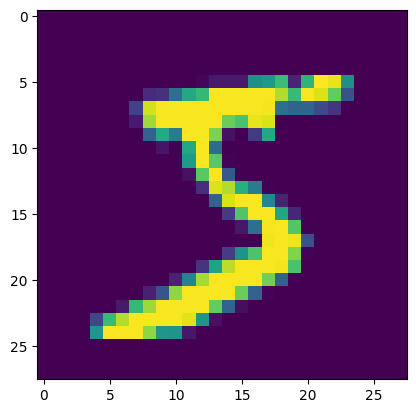

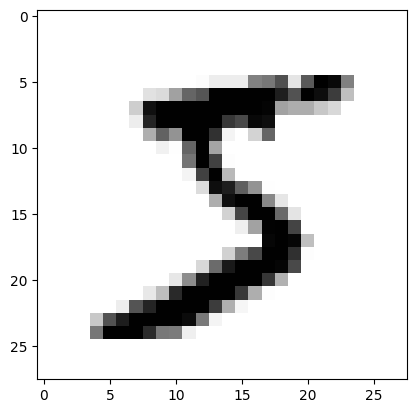

In [79]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [80]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

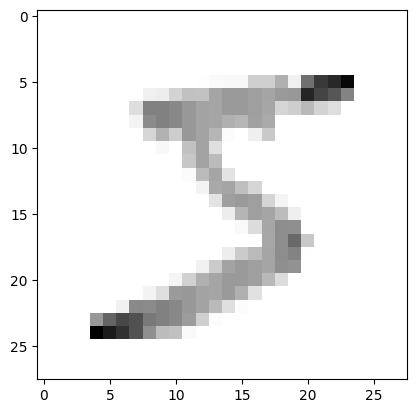

In [81]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [82]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [83]:
print(y_train[0])

5


In [84]:
IMG_SIZE = 28
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension: ", X_train.shape)
print("Testing Samples dimension: ", X_test.shape)

Training Samples dimension:  (60000, 28, 28, 1)
Testing Samples dimension:  (10000, 28, 28, 1)


In [85]:
model = Sequential()

# First Convolution Layer 
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:])) # only for first convolution layer to mention input layer size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully connnected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))


c:\Users\QUANG PHAT\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [88]:
model.fit(X_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.8966 - loss: 0.3244 - val_accuracy: 0.9504 - val_loss: 0.1577
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.9681 - loss: 0.1052 - val_accuracy: 0.9716 - val_loss: 0.0951
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9760 - loss: 0.0780 - val_accuracy: 0.9787 - val_loss: 0.0711
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.9812 - loss: 0.0600 - val_accuracy: 0.9758 - val_loss: 0.0791
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.9850 - loss: 0.0480 - val_accuracy: 0.9818 - val_loss: 0.0604


In [89]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9801 - loss: 0.0643


In [90]:
print("Test Loss on 10000 test samples: ", test_loss)
print("Validation Accuracy on 10000 test samples: ", test_acc)

Test Loss on 10000 test samples:  0.06428094208240509
Validation Accuracy on 10000 test samples:  0.9800999760627747


In [91]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [92]:
print(predictions)

[[9.21474793e-07 7.12097171e-05 1.38795149e-04 ... 9.99726117e-01
  1.93785672e-06 2.55676950e-05]
 [1.43642013e-03 2.61929790e-06 9.98511016e-01 ... 2.29814361e-07
  3.23269996e-05 3.50962341e-06]
 [5.91959633e-07 9.99981046e-01 1.00410498e-05 ... 4.59122521e-06
  4.30272067e-08 2.14072173e-07]
 ...
 [2.90430307e-07 8.17542514e-06 2.26470974e-07 ... 1.21300695e-06
  1.60769798e-06 2.64930768e-05]
 [2.48216020e-06 4.07494281e-06 1.21897344e-07 ... 2.54573305e-08
  5.11080871e-05 5.36272857e-08]
 [1.49299976e-05 1.24504112e-07 5.13468549e-05 ... 2.09928956e-07
  1.40913435e-05 9.94764264e-07]]


In [93]:
print(np.argmax(predictions[0]))

7


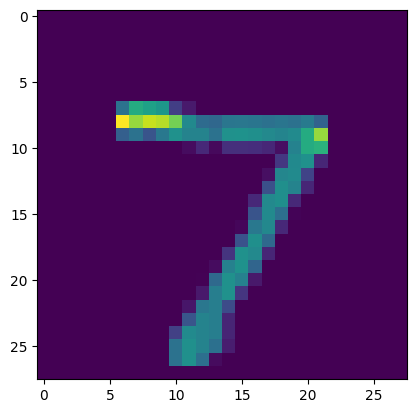

In [94]:
plt.imshow(X_test[0])

In [95]:
img = cv2.imread("8.png")

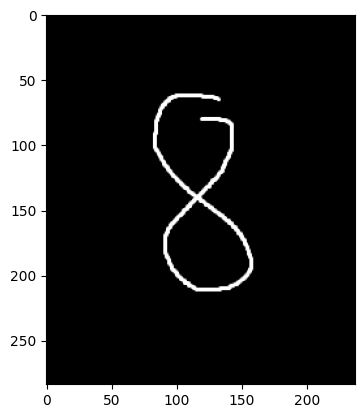

In [96]:
plt.imshow(img)

In [97]:
img.shape

(284, 237, 3)

In [101]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [102]:
gray.shape

(284, 237)

In [103]:
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

In [104]:
resized.shape

(28, 28)

In [105]:
new_img = tf.keras.utils.normalize(resized, axis=1)

In [106]:
new_img = np.array(new_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [107]:
new_img.shape

(1, 28, 28, 1)

In [108]:
predictions = model.predict(new_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [109]:
print(np.argmax(predictions))

8
